In [23]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [24]:
# 读取数据
store_data = pd.read_csv("./data/market_data.csv", header=None)
print(type(store_data))
store_data

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 数据类型转换
dataset = []
for i in range(1,len(store_data)):
        dataset.append([str(store_data.values[i, j]) for j in range(0,20)])
print(len(dataset))
print(type(dataset))
print(dataset[:10])

7500
<class 'list'>
[['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole wheat pasta', 'french fries', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['soup', 'light cream', 'shallot',

In [26]:
# 根据关联规则划分频繁项集
association_rules = apriori(dataset, min_support=0.005, min_confidence=0.2, min_lift=3)
frequent_itemset = list(association_rules)
print(len(frequent_itemset))
print(frequent_itemset)

38
[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]), RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.016, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2915549671393096)]), RelationRecord(items=frozenset({'ground beef', 'tomato sauce'}), support=0.005333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'ground beef'}), c

In [27]:
# 查看频繁项集
for i in range(0, len(frequent_itemset)):
    print(frequent_itemset[i][0])

frozenset({'escalope', 'mushroom cream sauce'})
frozenset({'escalope', 'pasta'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'ground beef', 'tomato sauce'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'pasta', 'shrimp'})
frozenset({'chocolate', 'shrimp', 'frozen vegetables'})
frozenset({'escalope', 'nan', 'mushroom cream sauce'})
frozenset({'escalope', 'pasta', 'nan'})
frozenset({'ground beef', 'spaghetti', 'frozen vegetables'})
frozenset({'shrimp', 'mineral water', 'frozen vegetables'})
frozenset({'olive oil', 'spaghetti', 'frozen vegetables'})
frozenset({'shrimp', 'spaghetti', 'frozen vegetables'})
frozenset({'tomatoes', 'spaghetti', 'frozen vegetables'})
frozenset({'grated cheese', 'ground beef', 'spaghetti'})
frozenset({'herb & pepper', 'ground beef', 'mineral water'})
frozenset({'herb & pepper', 'ground beef', 'nan'})
frozenset({'herb & pepper', 'ground beef', 'spaghetti'})
frozenset({'ground beef', 'nan', 'tomato sauce'})
frozenset({'ground beef', 'spaghet

In [28]:
# 查看支持度，置信度，提升度
itemnames=[]
support=[]
confidence=[]
lift=[]
for item in frequent_itemset:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3])+"\n")
    
    itemnames.append(items[0]+'->'+items[1])
    support.append(item[1])
    confidence.append(item[2][0][2])
    lift.append(item[2][0][3])
    


Rule: escalope -> mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845

Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287

Rule: herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096

Rule: ground beef -> tomato sauce
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528

Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346

Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151

Rule: chocolate -> shrimp
Support: 0.005333333333333333
Confidence: 0.23255813953488372
Lift: 3.260160834601174

Rule: escalope -> nan
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845

Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.7

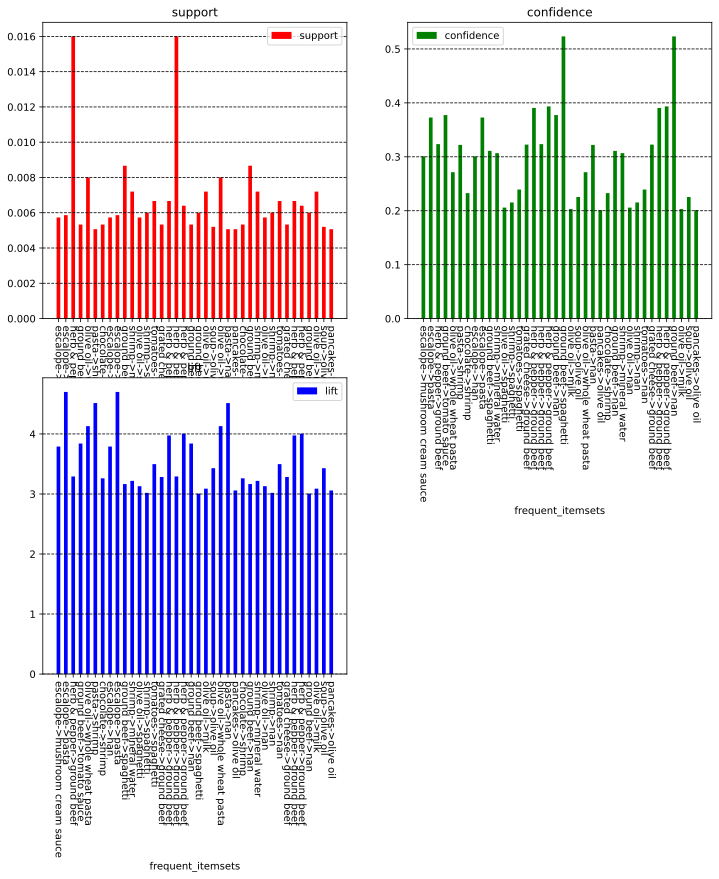

In [29]:
# 对结果作图
index1 = np.array(list(range(len(frequent_itemset))))
plt.figure(figsize=(12,12),dpi=100)

plt.subplot(2,2,1)
plt.bar(index1,support,width=0.5, color='r', label='support')
plt.xticks(index1,itemnames, rotation=-90)
plt.legend()
plt.xlabel('frequent_itemsets')
plt.title('support')
plt.grid(axis='y', ls='--',color='black')

plt.subplot(2,2,2)
plt.bar(index1,confidence,width=0.5, color='g', label='confidence')
plt.xticks(index1,itemnames, rotation=-90)
plt.legend()
plt.xlabel('frequent_itemsets')
plt.title('confidence')
plt.grid(axis='y', ls='--',color='black')

plt.subplot(2,2,3)
plt.bar(index1,lift,width=0.5, color='b', label='lift')
plt.xticks(index1,itemnames, rotation=-90)
plt.legend()
plt.xlabel('frequent_itemsets')
plt.title('lift')
plt.grid(axis='y', ls='--',color='black')
# fig = plt.figure()
# fig.tight_layout(h_pad=10.0)
plt.savefig('./pictures/result.png')